## Лабораторная работа №1 | Вариант 6

Выполнила : Османова Виктория Андреевна М8О-313Б-23

### 1. Numpy

In [23]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [4]:
a = np.eye(3)
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [7]:
a = np.diag([1, 2, 3, 4], k = -1)
print(a)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

In [ ]:
9 # 0 + 1 + 2 + 3 + 4 - 1
10 # sum([0, 1, 2, 3, 4], axis = -1)

10

4. Как найти самое часто встречаемое значение между двумя массивами? 

In [28]:
a = np.random.randint(0, 10, 10)
b = np.random.randint(0, 10, 10)
print(a, b)

c = np.concatenate((a, b))
values, counts = np.unique_counts(c)
print()
print(values)
print(counts)
print(values[np.argmax(counts)])


[7 0 4 4 3 2 0 9 3 3] [6 4 5 8 5 9 2 7 0 2]

[0 2 3 4 5 6 7 8 9]
[3 3 3 3 2 1 2 1 2]
0


5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [34]:
# np.seterr(all='raise')
np.seterr(all='ignore')
a = np.array([0, 1, 2])
b = np.array([2, 1, 0])
print(a / b)

[ 0.  1. inf]


6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [41]:

def generator() :
    for _ in range(10):
        yield np.random.randint(0, 10)

a = np.fromiter(generator(), dtype=int)
print(a)

[2 5 7 1 7 6 1 6 0 3]


7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [46]:
a = np.random.randint(0, 10, 10)
a.sort()
print(a)

[1 2 3 3 5 5 6 7 8 9]


8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [59]:
def to_polar(x, y) :
    r = (x ** 2 + y ** 2) ** 0.5
    phi = np.arctan2(y, x)
    return r, phi

a = np.random.random((10, 2)) * 2 - 1
print(a)
b = np.array([to_polar(*i) for i in a])
print(b)

[[ 0.60667167 -0.36595493]
 [ 0.38781646  0.11034645]
 [ 0.0935213   0.55284776]
 [-0.31089949 -0.84816011]
 [ 0.17105745 -0.90263426]
 [ 0.81787489  0.53517974]
 [ 0.25872278 -0.55020017]
 [ 0.56157172 -0.00598584]
 [-0.13041487 -0.85291032]
 [-0.64159049 -0.23898369]]
[[ 0.7085009  -0.54278191]
 [ 0.40320956  0.27720688]
 [ 0.56070213  1.40321992]
 [ 0.90334604 -1.92214493]
 [ 0.91869976 -1.38350818]
 [ 0.97741326  0.57942997]
 [ 0.60799482 -1.13124387]
 [ 0.56160362 -0.01065867]
 [ 0.8628233  -1.72252683]
 [ 0.68465434 -2.78502756]]


9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [144]:
pixel_dtype = np.dtype([
    ('x', np.int32),
    ('y', np.int32),
    ('r', np.uint8),
    ('g', np.uint8),
    ('b', np.uint8)
])

p1 = (1, 0, 255, 50, 20)
p2 = (0, 1, 70, 100, 255)

pixels = np.array([p1, p2], dtype=pixel_dtype)
print(pixels)
print(pixels[0]['r'])

[(1, 0, 255,  50,  20) (0, 1,  70, 100, 255)]
255


10. Как конвертировать тип массив от float32 в int32 in place?

In [140]:
a = np.array([1.0, 3.7, 6.1], dtype=np.float32)
print(id(a.data), a)
b = a.view(np.int32)
b[:] = a

print(id(b.data), b)

2009355718464 [1.  3.7 6.1]
2009355718464 [1 3 6]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [4]:
import pandas as pd

In [5]:
ds = pd.read_csv("student_perfomance.csv")
display(ds.head(3))

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74


1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [160]:
average_sleep_hours = ds['Sleep_Hours'].mean()
print(average_sleep_hours)

7.029060087785682


2. Сколько процентов студентов посещают внеклассовые активности?

In [165]:
p = len(ds.query("Extracurricular_Activities == 'Yes'")) / len(ds) * 100
print(p)

59.60345088542455


3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [ ]:
female_average = ds.query("Gender == 'Female'")['Exam_Score'].mean()
male_average = ds.query("Gender == 'Male'")['Exam_Score'].mean()
print(female_average, male_average, female_average - male_average)
# Правда, но всего на 0.016 баллов

67.24489795918367 67.22889355007865 0.016004409105022432


4. Выведите 25 и 75 перцентили времени сна студентов

In [242]:
display(ds['Sleep_Hours'].quantile([0.25, 0.75]))

0.25    6.0
0.75    8.0
Name: Sleep_Hours, dtype: float64

5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [ ]:
low_adge, high_adge = ds['Sleep_Hours'].quantile([0.25, 0.75])
low_sleep_average = ds.query(f"Sleep_Hours <= {low_adge}")['Exam_Score'].mean()
high_sleep_average =  ds.query(f"Sleep_Hours >= {high_adge}")['Exam_Score'].mean()
print(low_sleep_average, high_sleep_average, low_sleep_average - high_sleep_average)
# Нет, не правда, студенты с недосыпом сдают в среднем на 0.1 баллов лучше


67.28109243697479 67.18704746580853 0.09404497116625521


6. Влияет ли физическая активность на результаты экзамена?

In [ ]:
# low_adge, high_adge = ds['Physical_Activity'].quantile([0.3, 0.8])
# print(low_adge, high_adge)
# low_phys_average = ds.query(f"Physical_Activity <= {low_adge}")['Exam_Score'].mean()
# mid_phys_average = ds.query(f"{low_adge} < Physical_Activity <= {high_adge}")['Exam_Score'].mean()
# high_phys_average =  ds.query(f"Physical_Activity > {high_adge}")['Exam_Score'].mean()
# print(low_phys_average, mid_phys_average, high_phys_average)

print(ds['Exam_Score'].mean())

for i in range(7) :
    s = ds.query(f"Physical_Activity == {i}")['Exam_Score']
    print(i, len(s), s.mean())


# При активности от 1 до 6 средний балл возрастает с 66.97 (ниже среднего) до 68.09 (выше среднего)
# Но при активности 0 наблюдается неожиданный средний балл 67.52, что немного выше среднего

67.23565914938702
0 46 67.52173913043478
1 421 66.96912114014252
2 1627 67.18500307314075
3 2545 67.19607072691552
4 1575 67.31301587301587
5 361 67.6038781163435
6 32 68.09375


7. Правда ли, что слуденты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

In [ ]:
# for i in ds['Parental_Education_Level'].unique():
#     s = ds.query(f"Parental_Education_Level == '{i}'")['Exam_Score']
#     print(i, len(s), s.mean())

s1 = ds.query(f"Parental_Education_Level == 'High School'")['Exam_Score']
s2 = ds.query(f"Parental_Education_Level != 'High School'")['Exam_Score']
print(len(s1), s1.mean())
print(len(s2), s2.mean())
print(s2.mean() - s1.mean())

# Да, правда, студенты, чьи родители имеют высшее образование получают в среднем на 0.66 больше

3223 66.89357741234875
3384 67.5614657210402
0.6678883086914453
53


8. Как влияет участие родителей на результаты экзаменов

In [ ]:
for i in ds['Parental_Involvement'].unique() :
    s = ds.query(f"Parental_Involvement == '{i}'")['Exam_Score']
    print(i, len(s), s.mean())

# В среднем чем больше учавтвуют родители, тем выше результаты

Low 1337 66.35826477187734
Medium 3362 67.09815585960737
High 1908 68.09276729559748


9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [ ]:

for i in ds['Family_Income'].unique() :
    s = ds.query(f"Family_Income == '{i}'")['Exam_Score']
    print(i, len(s), s.mean())

s1 = ds.query(f"Family_Income == 'High'")['Exam_Score']
s2 = ds.query(f"Family_Income != 'High'")['Exam_Score']

print(s1.mean(), s2.mean(), s1.mean() - s2.mean())

# Да, в семьях с высоким доходом дети сдают в среднем на 0.75 баллов лучше чем остальные

Low 2672 66.84842814371258
Medium 2666 67.33495873968492
High 1269 67.84239558707644
67.84239558707644 67.09142000749344 0.7509755795829989


10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

In [240]:
s = ds.query("Family_Income == 'Low' & Internet_Access == 'No'")['Exam_Score']
print(len(s[s > 70]) / len(s) * 100)

8.056872037914692


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

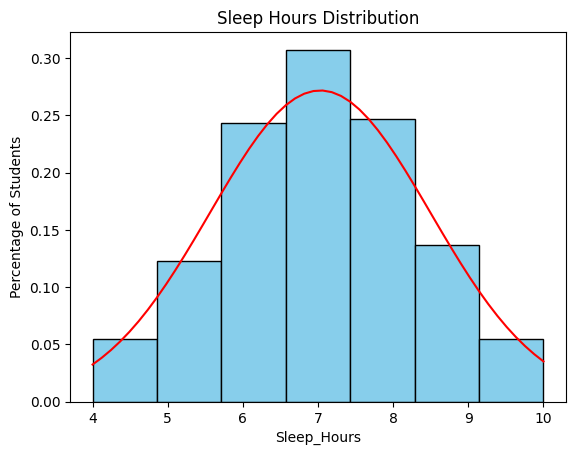

In [25]:
mu, sigma = ds["Sleep_Hours"].mean(), ds["Sleep_Hours"].std()

x = np.linspace(4, 10)
norm = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-((x - mu)**2) / (2 * sigma**2))

plt.hist(ds["Sleep_Hours"], bins=7, color="skyblue", edgecolor='black', density=True)
plt.plot(x, norm, color='red')
plt.title("Sleep Hours Distribution")
plt.xlabel("Sleep_Hours")
plt.ylabel("Percentage of Students")
plt.show()

# Да, распределение времени сна примерно нормально

2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

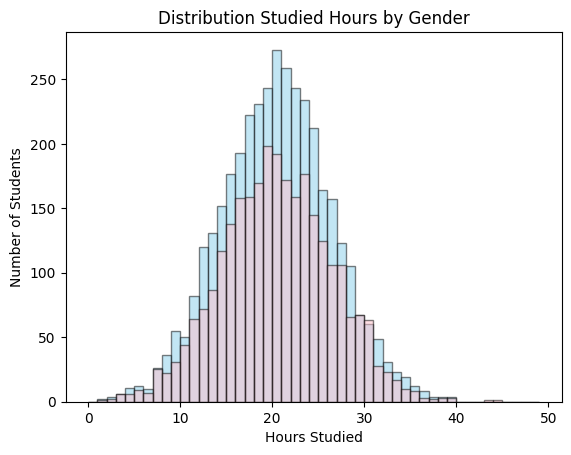

In [57]:
plt.hist(ds.query("Gender == 'Male'")["Hours_Studied"], bins=range(50), color="skyblue", edgecolor='black', alpha=0.5)
plt.hist(ds.query("Gender == 'Female'")["Hours_Studied"], bins=range(50), color="pink", edgecolor='black', alpha=0.5)
plt.title("Distribution Studied Hours by Gender")
plt.xlabel("Hours Studied")
plt.ylabel("Number of Students")
plt.show()

3. Как зависит результат конечного экзамена от результата первого экзамена

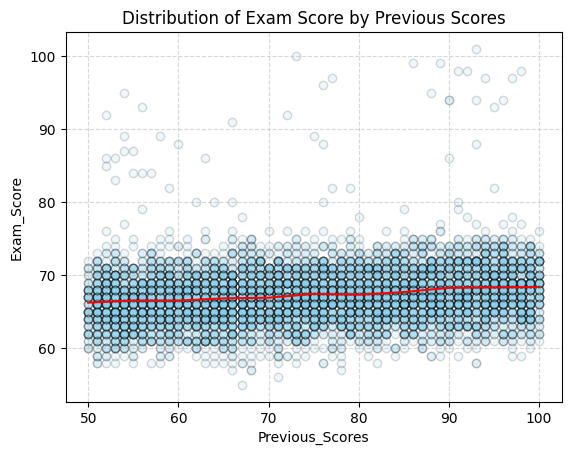

0.17507908702291092


In [ ]:
x = ds["Previous_Scores"]
y = ds["Exam_Score"]
bins = np.arange(50, 110, 5)
mean_by_bin = [y[(x >= bins[i]) & (x < bins[i+1])].mean() for i in range(len(bins)-1)]
plt.plot(bins[:-1], mean_by_bin, color='red')

plt.scatter(x, y, color='skyblue', edgecolor='black', alpha=0.15)
plt.title("Distribution of Exam Score by Previous Scores")
plt.xlabel("Previous_Scores")
plt.ylabel("Exam_Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
corr = ds["Previous_Scores"].corr(ds["Exam_Score"])
print(corr)

# Чем лучше результаты предыдущих экзаменов, тем лучше результы итогового, на графике видно как средний балл немного растёт

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

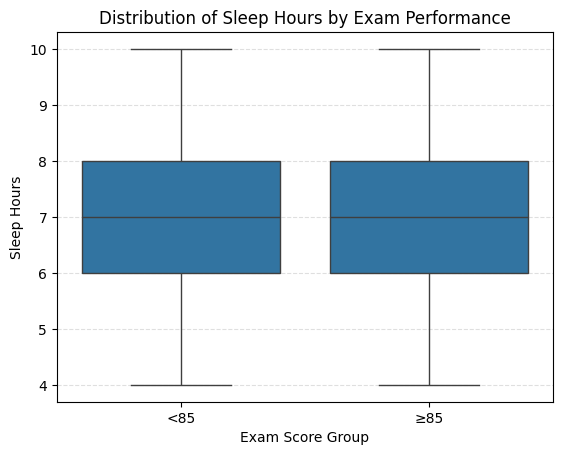

In [58]:
sns.boxplot(
    data=ds,
    x=np.where(ds["Exam_Score"] >= 85, "≥85", "<85"),  # группы создаются "на лету"
    y=ds["Sleep_Hours"]
)
plt.title("Distribution of Sleep Hours by Exam Performance")
plt.xlabel("Exam Score Group")
plt.ylabel("Sleep Hours")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

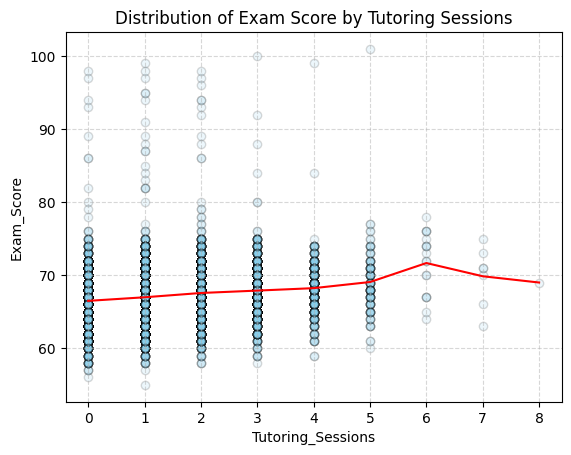

0.15652518539225324


In [77]:
x = ds["Tutoring_Sessions"]
y = ds["Exam_Score"]
bins = np.arange(0, 10, 1)
mean_by_bin = [y[(x >= bins[i]) & (x < bins[i+1])].mean() for i in range(len(bins)-1)]
plt.plot(bins[:-1], mean_by_bin, color='red')

plt.scatter(x, y, color='skyblue', edgecolor='black', alpha=0.15)
plt.title("Distribution of Exam Score by Tutoring Sessions")
plt.xlabel("Tutoring_Sessions")
plt.ylabel("Exam_Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
corr = ds["Tutoring_Sessions"].corr(ds["Exam_Score"])
print(corr)

# Да, влияет, на графике видно как растёт среднее значение
# Спад в конце можно объяснить небольшой выборкой: совсем немного студентов посещают 7-8 занятий

6. Как физическая активность влияет на успеваемость?

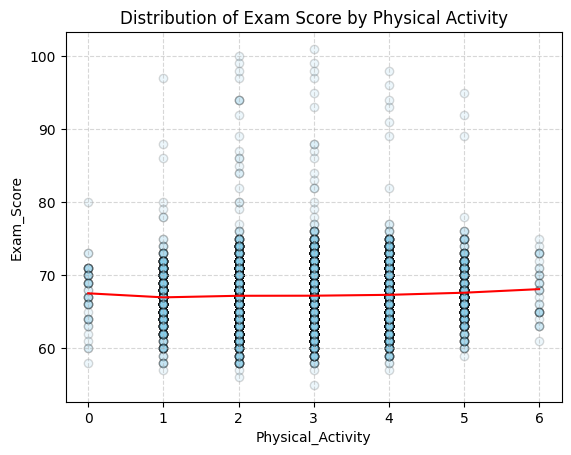

0.02782443618025744


In [ ]:
x = ds["Physical_Activity"]
y = ds["Exam_Score"]
bins = np.arange(0, 10, 1)
mean_by_bin = [y[(x >= bins[i]) & (x < bins[i+1])].mean() for i in range(len(bins)-1)]
plt.plot(bins[:-1], mean_by_bin, color='red')

plt.scatter(x, y, color='skyblue', edgecolor='black', alpha=0.15)
plt.title("Distribution of Exam Score by Physical Activity")
plt.xlabel("Physical_Activity")
plt.ylabel("Exam_Score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
corr = ds["Physical_Activity"].corr(ds["Exam_Score"])
print(corr)

# График подтверждает вывод из задания 2.6: при повышении активности балл растёт


7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл

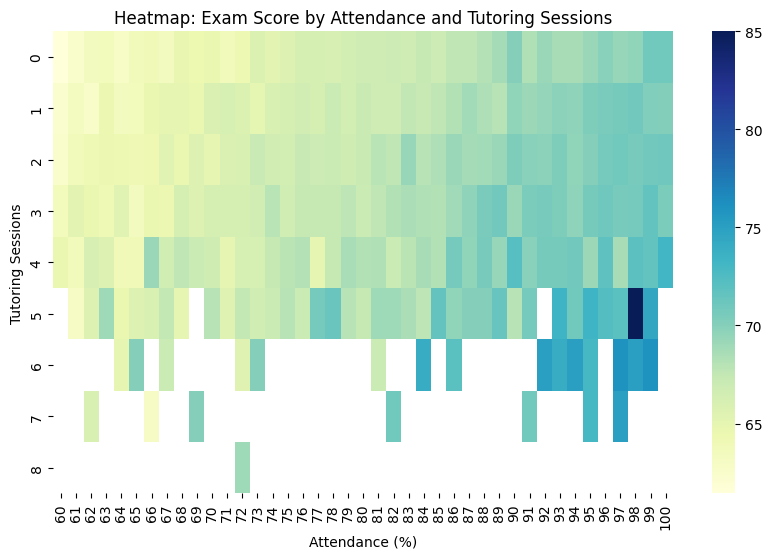

In [85]:
pivot = ds.pivot_table(
    index="Tutoring_Sessions",
    columns="Attendance",
    values="Exam_Score",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
sns.heatmap(
    pivot,
    cmap="YlGnBu"
)
plt.title("Heatmap: Exam Score by Attendance and Tutoring Sessions")
plt.xlabel("Attendance (%)")
plt.ylabel("Tutoring Sessions")
plt.show()